# Rice Diseases are classified using CNN with Tensorflow

In [52]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [53]:
# import train.csv file
data = pd.read_csv("./data/train.csv")
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [54]:
# check the shape of data
data.shape

(10407, 4)

In [55]:
data['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [56]:
data['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [57]:
data['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

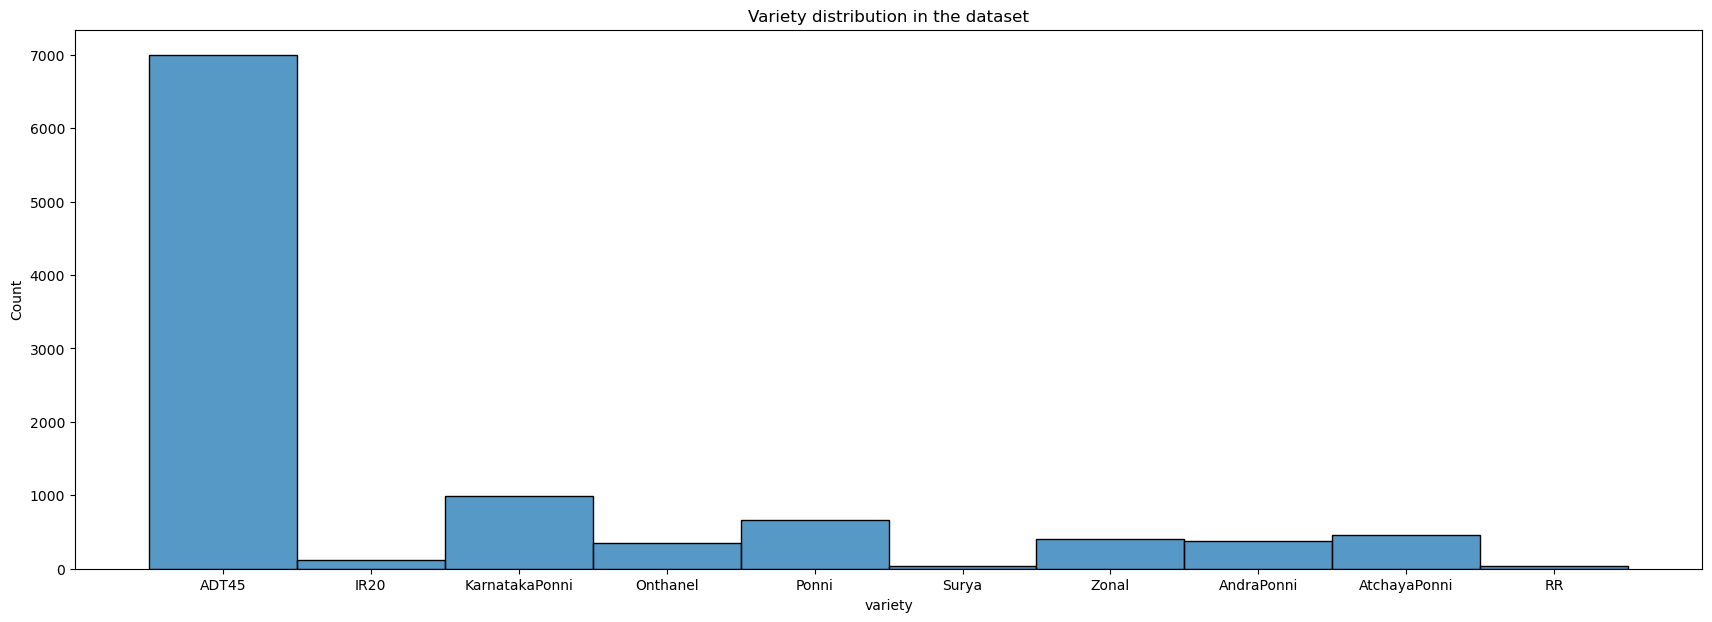

In [58]:
# plot the data count based on variety name
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(data,x='variety',ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

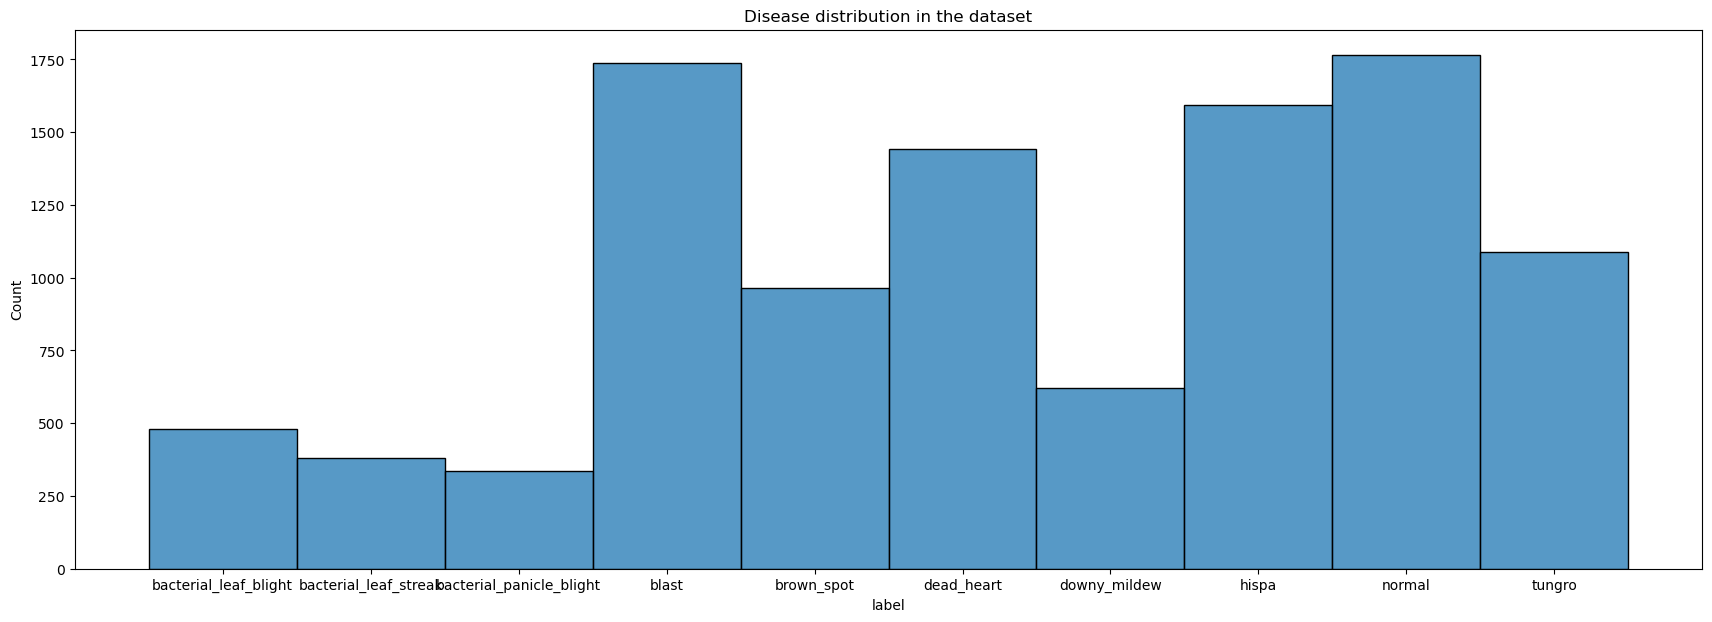

In [59]:
# plot the data count based on variety name
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(data,x='label',ax=axes)
plt.title('Disease distribution in the dataset')
plt.show()

In [60]:
normal = data[data['label'] =='normal']
normal = normal[normal['variety'] =='ADT45']
five_normals = normal.image_id[:5].values
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [61]:
dead = data[data['label'] =='dead_heart']
dead = dead[dead['variety'] =='ADT45']
five_deads= dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

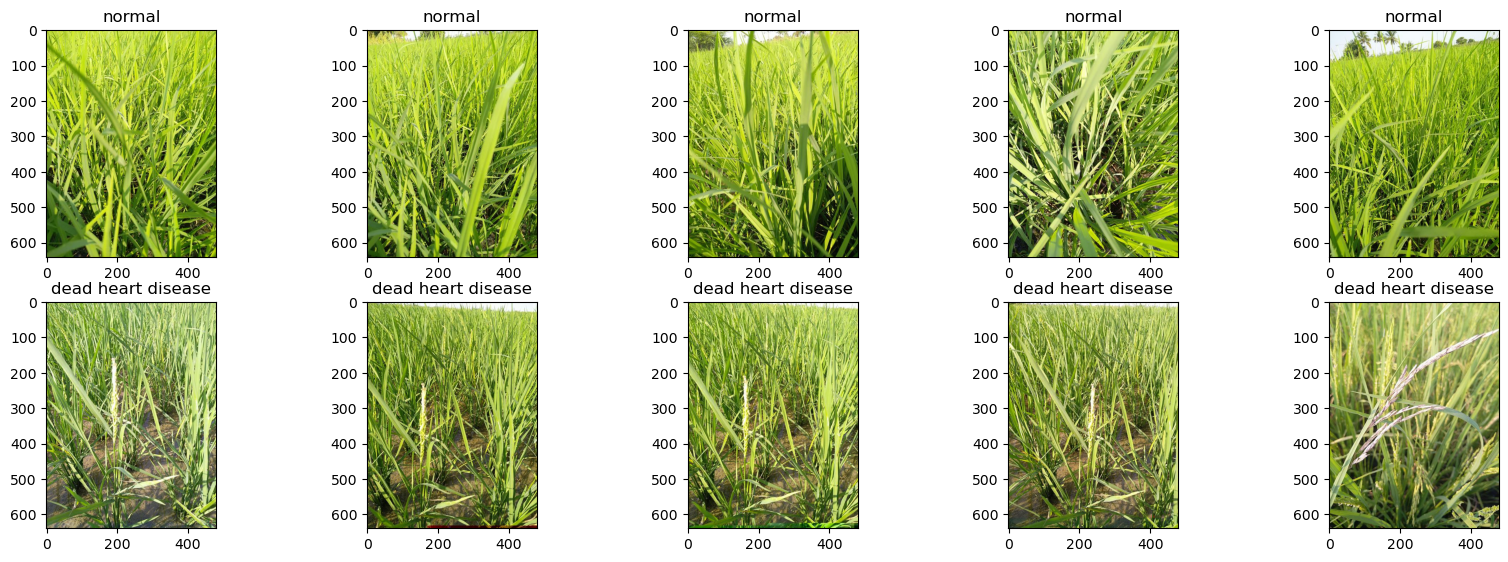

In [62]:
# make plot of images just to have an idea
plt.figure(figsize=(20,10))
columns = 5
path = './data/train_images/'
for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10//columns + 1, columns, i + 1)
    
    if i < 5:
        image=plt.imread(path +"normal/"+ image_loc)
        plt.title("normal")
    else:
        plt.title("dead heart disease")
        image=plt.imread(path +"dead_heart/"+ image_loc)
        
    plt.imshow(image)

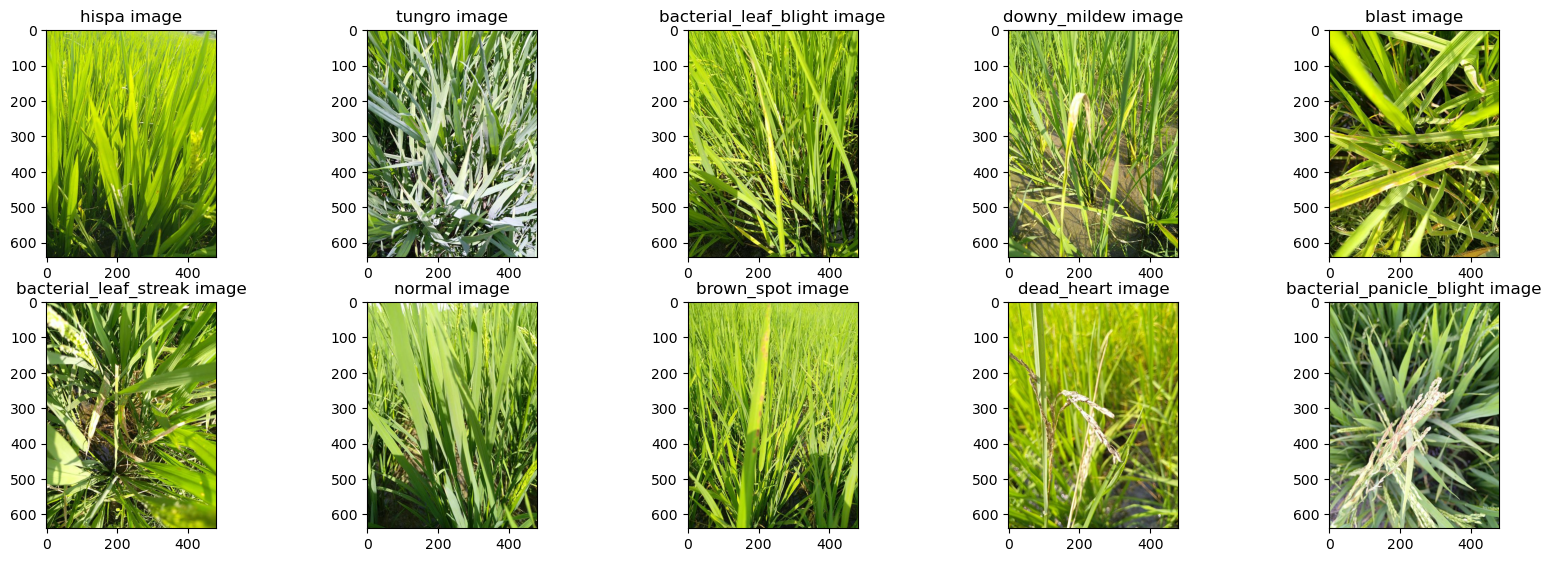

In [63]:
images = ['./data/train_images/hispa/106590.jpg',\
          './data/train_images/tungro/109629.jpg',\
          './data/train_images/bacterial_leaf_blight/109372.jpg',\
          './data/train_images/downy_mildew/102350.jpg',\
          './data/train_images/blast/110243.jpg',\
          './data/train_images/bacterial_leaf_streak/101104.jpg',\
          './data/train_images/normal/109760.jpg',\
          './data/train_images/brown_spot/104675.jpg',\
          './data/train_images/dead_heart/105159.jpg',\
          './data/train_images/bacterial_panicle_blight/101351.jpg',\
         ]
diseases = ['hispa','tungro','bacterial_leaf_blight','downy_mildew','blast','bacterial_leaf_streak',\
           'normal','brown_spot','dead_heart','bacterial_panicle_blight']
diseases = [disease + ' image' for disease in diseases]
plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns + 1, columns, i + 1)
    image=plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

In [64]:
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [65]:
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['variety'] = label_encoder.fit_transform(data['variety'])

data.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


In [66]:
# define parameter
batch_size = 32
img_height = 224
img_width = 224

In [67]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [68]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [69]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [70]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [71]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [72]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [73]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [74]:
num_classes = len(class_names)
num_classes

10

In [75]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [76]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Epoch 1/100


2024-01-27 21:28:47.800172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 2.0113 - accuracy: 0.2890

2024-01-27 21:29:08.788891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 23s 85ms/step - loss: 2.0113 - accuracy: 0.2890 - val_loss: 1.9143 - val_accuracy: 0.3609
Epoch 2/100
261/261 [==============================] - 23s 86ms/step - loss: 1.7987 - accuracy: 0.4216 - val_loss: 1.9481 - val_accuracy: 0.3618
Epoch 3/100
261/261 [==============================] - 20s 78ms/step - loss: 2.3096 - accuracy: 0.3538 - val_loss: 2.0590 - val_accuracy: 0.2753
Epoch 4/100
261/261 [==============================] - 22s 83ms/step - loss: 2.3038 - accuracy: 0.4022 - val_loss: 3.5584 - val_accuracy: 0.3796
Epoch 5/100
261/261 [==============================] - 21s 82ms/step - loss: 25.9447 - accuracy: 0.3939 - val_loss: 204.9251 - val_accuracy: 0.3186
Epoch 6/100
261/261 [==============================] - 21s 79ms/step - loss: 1922.1434 - accuracy: 0.3792 - val_loss: 12233.5879 - val_accuracy: 0.3133
Epoch 7/100
261/261 [==============================] - 21s 79ms/step - loss: 51648.9570 - accuracy: 0.3965 - val_loss: 130424.1719 -

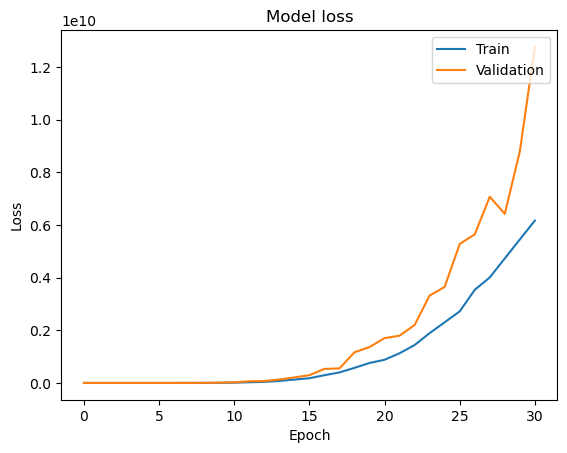

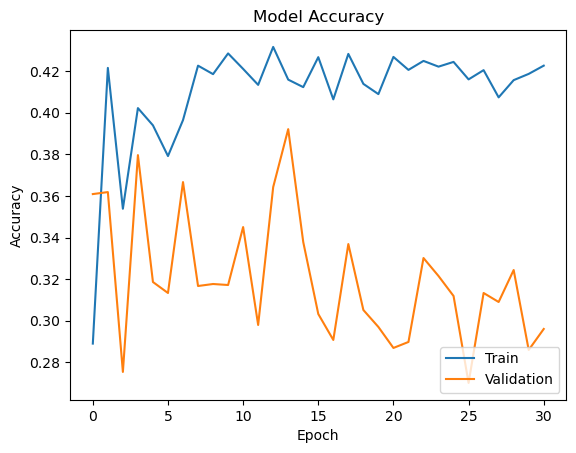

CPU times: user 2min 20s, sys: 1min 5s, total: 3min 26s
Wall time: 10min 56s


In [77]:
%%time
#remove warnings
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.callbacks import EarlyStopping
# Define the callback function
early_stopping = EarlyStopping(patience=30)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=100,
          callbacks=[early_stopping])

# evaluat the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## Observations:
1. We have 10407, images in train data.
2. We have 10 unique disease classes.
3. We also have 10 variesites of RICE in this data.
4. We have rice plant age ranging from 45 - 85 days.
5. ADT45 is the most common variety inside the training data.